# **Leer data transformadores**

In [1]:
import pandas as pd

# Lee el archivo CSV
df_transformadores = pd.read_csv('df_rellenado_con_nans.csv')

# Muestra las primeras filas del DataFrame
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
0,2021-01-01 00:30:00,6657.061100,392.181486,9087.688446,-89.524969,9393.958092,1439.777136,8747.844727,-132.386734,4363.275051,...,8986.115234,1787.867920,14563.25817,1948.054075,8607.710838,1346.077800,7858.459949,467.431158,verano,verano
1,2021-01-01 00:45:00,6600.084782,370.762348,9007.225990,-48.079155,9353.917122,1430.533409,8626.563477,-140.524490,4372.547626,...,8946.944336,1806.897827,14303.06339,2033.608913,8421.904564,1292.887449,7973.084927,486.736864,verano,verano
2,2021-01-01 01:00:00,6579.427719,385.641813,8908.111572,-71.154483,9084.967613,1380.251646,8546.049805,-164.159393,4297.423363,...,8749.440430,1736.990967,14161.10229,2011.147261,8396.206856,1296.282291,7781.050682,708.620131,verano,verano
3,2021-01-01 01:15:00,6523.938179,389.757663,8725.055695,-123.746052,8897.534370,1328.508615,8458.301758,-164.846237,4189.702034,...,8650.058594,1721.460083,14255.73540,2104.893208,8420.323372,1306.474209,7601.181507,1331.551671,verano,verano
4,2021-01-01 01:30:00,6389.933586,364.311010,8571.299553,-159.668446,8714.198112,1283.114433,8302.192383,-205.847855,4165.856361,...,8527.763672,1702.901367,13911.45802,1989.736915,8410.838127,1365.293384,7718.300819,1400.925994,verano,verano


In [2]:
columnas = [
    'Fecha y hora',
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)',
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)',
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)',  
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)',
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    'estacion'
]

df_transformadores = df_transformadores[columnas]

df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os

transformador_columnas_p = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)"
]
     
     
  
#potencia reactiva
transformador_columnas_q = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",  
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)", 
 "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)"
]

In [6]:
# Unir ambas listas de columnas
columnas_a_convertir = transformador_columnas_p + transformador_columnas_q

# Aplicar la conversión: dividir por 1000
df_transformadores[columnas_a_convertir] = df_transformadores[columnas_a_convertir] / 1000

In [7]:
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),estacion
0,2021-01-01 00:30:00,6.657061,14.563258,0.392181,1.948054,9.087688,-0.089525,verano
1,2021-01-01 00:45:00,6.600085,14.303063,0.370762,2.033609,9.007226,-0.048079,verano
2,2021-01-01 01:00:00,6.579428,14.161102,0.385642,2.011147,8.908112,-0.071154,verano
3,2021-01-01 01:15:00,6.523938,14.255735,0.389758,2.104893,8.725056,-0.123746,verano
4,2021-01-01 01:30:00,6.389934,13.911458,0.364311,1.989737,8.571300,-0.159668,verano


In [8]:
# Asegúrate de que la columna 'Fecha y hora' sea de tipo datetime
df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])

# Mostrar la fecha mínima y máxima
fecha_min = df_transformadores['Fecha y hora'].min()
fecha_max = df_transformadores['Fecha y hora'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)


Fecha mínima: 2021-01-01 00:30:00
Fecha máxima: 2025-04-21 00:00:00


In [13]:
# Definir las fechas de inicio y fin
fecha_inicio = pd.to_datetime('2022-09-01 00:00:00')
fecha_fin = pd.to_datetime('2025-04-08 00:00:00')

# Filtrar el DataFrame para que solo contenga registros entre fecha_inicio y fecha_fin
df_transformadores = df_transformadores[(df_transformadores['Fecha y hora'] >= fecha_inicio) & (df_transformadores['Fecha y hora'] <= fecha_fin)]

In [15]:
df_transformadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91201 entries, 58366 to 149566
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Fecha y hora                                                    91201 non-null  datetime64[ns]
 1   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)      91201 non-null  float64       
 2   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)      91201 non-null  float64       
 3   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)  91201 non-null  float64       
 4   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)  91201 non-null  float64       
 5   SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)          91201 non-null  float64       
 6   SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)      91201 non-null  float64

# **Leer data meteorologica**

In [11]:
import pandas as pd

# Lee el archivo CSV con separador ;
df_meteorologico = pd.read_csv('df_meteorologico.csv', sep=';')

# Muestra las primeras filas del DataFrame
df_meteorologico.head()

,Date & Time,Estacion,Temp - °C,Punto de rocío - °C,Bulbo Húmedo - °C,Velocidad del Viento Media - km/h,Hum - %,Barómetro - mb,Lluvia - mm,Días-grado de enfriamiento,Días-grado de calentamiento,Estacion_Anual
0,2023-06-24 00:00:00,Los Andes,12.0,11.0,12.0,0.0,93.0,1023.0,0.6,0.0,0.123,invierno
1,2023-06-24 00:00:00,Baron,16.0,15.0,16.0,6.0,92.0,1018.4,0.3,0.0,0.021,invierno
2,2023-06-24 00:00:00,Curauma,15.0,14.0,14.0,0.0,98.0,1020.8,0.0,0.0,0.039,invierno
3,2023-06-24 00:00:00,La Cruz,17.0,14.0,15.0,1.0,84.0,1020.5,0.0,0.0,0.012,invierno
4,2023-06-24 00:15:00,Curauma,15.0,14.0,14.0,1.0,98.0,1020.6,0.3,0.0,0.038,invierno


In [12]:
# Asegúrate de que la columna 'Fecha y hora' sea de tipo datetime
df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])

# Mostrar la fecha mínima y máxima
fecha_min = df_meteorologico['Date & Time'].min()
fecha_max = df_meteorologico['Date & Time'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2023-06-24 00:00:00
Fecha máxima: 2025-04-08 00:00:00


In [13]:
df_meteorologico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251140 entries, 0 to 251139
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date & Time                        251140 non-null  datetime64[ns]
 1   Estacion                           251140 non-null  object        
 2   Temp - °C                          251140 non-null  float64       
 3   Punto de rocío - °C                251140 non-null  float64       
 4   Bulbo Húmedo - °C                  251140 non-null  float64       
 5   Velocidad del Viento Media - km/h  251140 non-null  float64       
 6   Hum - %                            251140 non-null  float64       
 7   Barómetro - mb                     251140 non-null  float64       
 8   Lluvia - mm                        251140 non-null  float64       
 9   Días-grado de enfriamiento         251140 non-null  float64       
 10  Días-grado de calent

### **Tabla información transformadores - estacion meteorologica**

In [15]:
# Crear la tabla con los nombres de los transformadores y la estación meteorológica
transformadores_estacion = pd.DataFrame({
    'Nombre_Transformador': [
        'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)', 
        'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)', 
        'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)', 
        'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'
    ],
    'Estacion_Meteorologica': ['Baron', 'Los Andes', 'Baron', 'Los Andes']
})
transformadores_estacion.head()

,Nombre_Transformador,Estacion_Meteorologica
0,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Baron
1,SE_San_Felipe.Trf_San_Felipe_T1 Potencia activ...,Los Andes
2,SE_Valparaiso.Trf_Valparaiso_T1 Potencia react...,Baron
3,SE_San_Felipe.Trf_San_Felipe_T1 Potencia react...,Los Andes


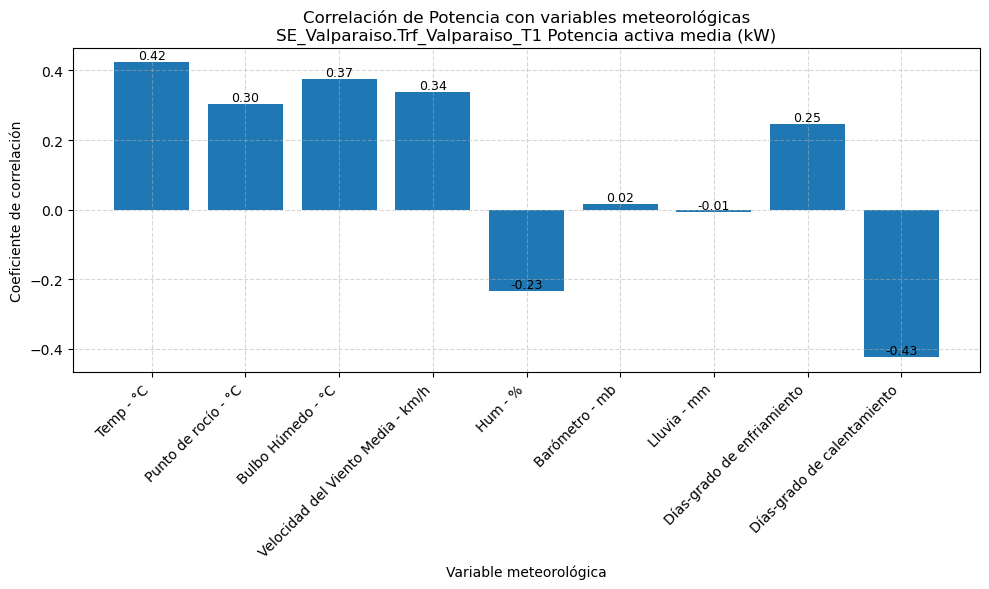

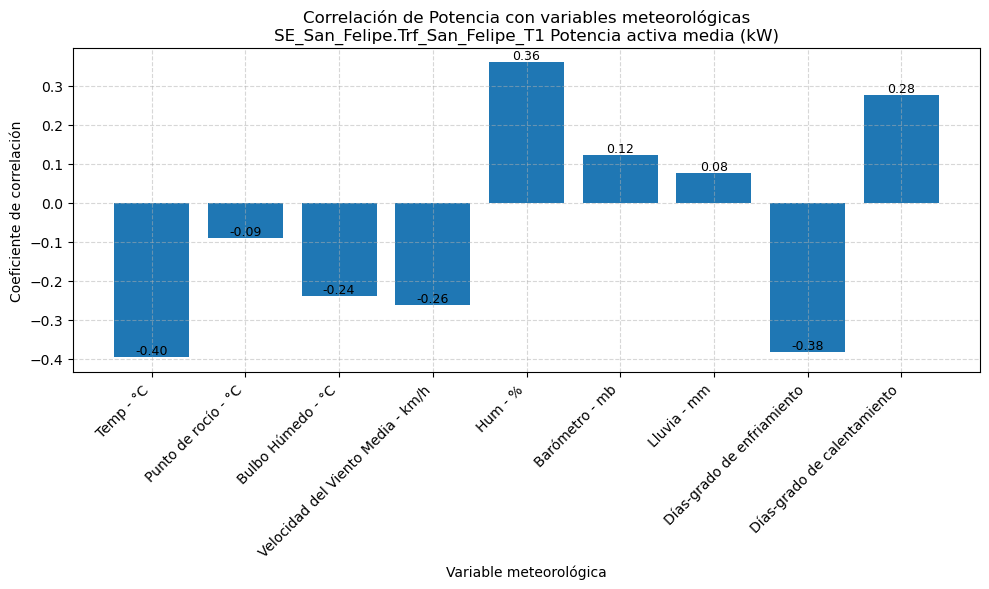

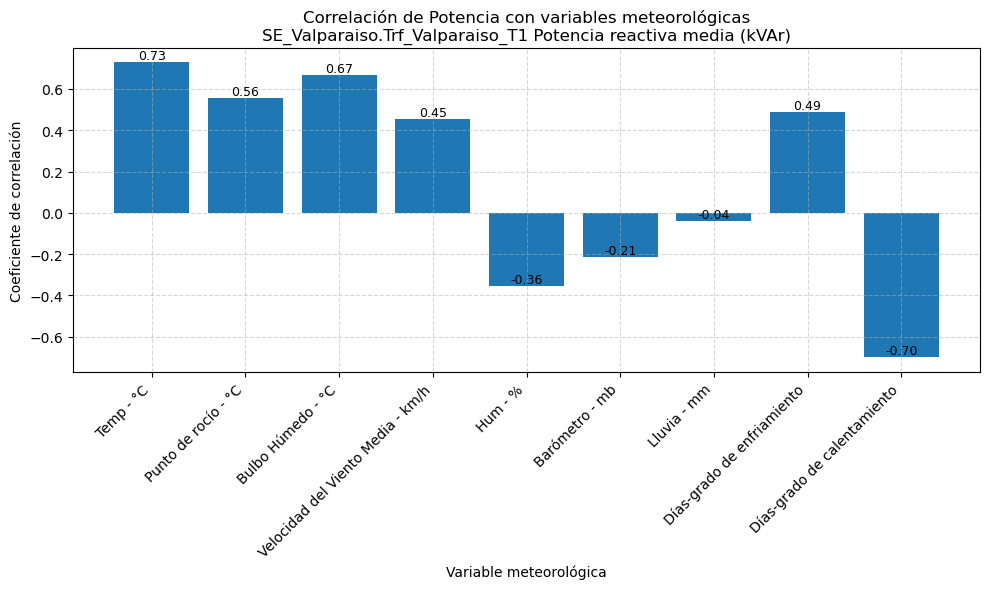

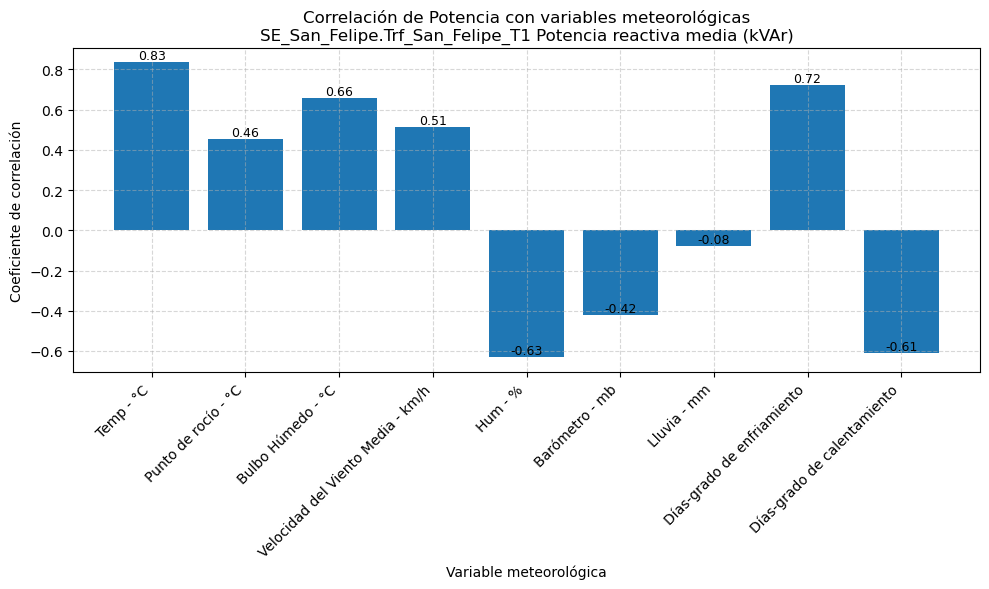

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Transformar el dataframe 'df_transformadores' a formato largo
transformador_filtrado_long = pd.melt(
    df_transformadores,
    id_vars=['Fecha y hora'],
    value_vars=[col for col in df_transformadores.columns if col != 'Fecha y hora'],
    var_name='Nombre_Transformador',
    value_name='Potencia'
)

# Unir con la tabla transformadores_estacion para agregar la estación meteorológica
transformador_filtrado_long = pd.merge(
    transformador_filtrado_long,
    transformadores_estacion,
    on='Nombre_Transformador'
)

# Asegurarse de que las fechas están en el mismo formato
transformador_filtrado_long['Fecha y hora'] = pd.to_datetime(transformador_filtrado_long['Fecha y hora'])
df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])

# Unir con df_meteorologico utilizando la fecha y la estación meteorológica
df_completo = pd.merge(
    transformador_filtrado_long,
    df_meteorologico,
    left_on=['Fecha y hora', 'Estacion_Meteorologica'],
    right_on=['Date & Time', 'Estacion']
)

# Lista de transformadores a analizar
transformadores_columns = [
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)', 
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)', 
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)', 
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'
]

# Calcular y graficar la correlación de la potencia con variables meteorológicas
for transformador in transformadores_columns:
    df_transformador = df_completo[df_completo['Nombre_Transformador'] == transformador].copy()

    # Asegurarse de que 'Potencia' sea numérica
    df_transformador['Potencia'] = pd.to_numeric(df_transformador['Potencia'], errors='coerce')

    # Seleccionar solo columnas numéricas
    df_numerico = df_transformador.select_dtypes(include=['float64', 'int64'])

    # Verificar que 'Potencia' está incluida y hay al menos otra columna para correlacionar
    if 'Potencia' not in df_numerico.columns or df_numerico.shape[1] < 2:
        print(f"No hay suficientes datos numéricos para calcular correlaciones para {transformador}.")
        continue

    # Calcular correlación de 'Potencia' con las demás variables meteorológicas
    correlaciones = df_numerico.corr()['Potencia'].drop('Potencia')  # Quitamos autocorrelación

    # Gráfico de barras verticales
    plt.figure(figsize=(10, 6))
    bars = plt.bar(correlaciones.index, correlaciones.values)

    # Añadir etiquetas con los valores numéricos encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval,
                 f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

    plt.title(f'Correlación de Potencia con variables meteorológicas\n{transformador}')
    plt.ylabel('Coeficiente de correlación')
    plt.xlabel('Variable meteorológica')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



# **Instalación de librerias**

In [17]:
!pip install prophet

In [18]:
from prophet import Prophet
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Modelos Placeres T1**

## Modelo parametros automaticos

In [35]:
def calcular_mape(y_true, y_pred, min_denominador=1.0):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true >= min_denominador
    if np.any(mask):
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        return np.nan

In [37]:
def ejecutar_modelo_prophet(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)
  

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con parámetros por defecto
    m = Prophet()
    m.fit(df_train)

    # Construir future con fechas necesarias (eval + test)
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')

    # Predecir
    forecast = m.predict(future)

    # Separar resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f" Test desde: {fecha_inicio_test.date()}")
    print(" TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print(" TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



 Evaluando P para 2025-03-17


17:33:20 - cmdstanpy - INFO - Chain [1] start processing
17:35:03 - cmdstanpy - INFO - Chain [1] done processing


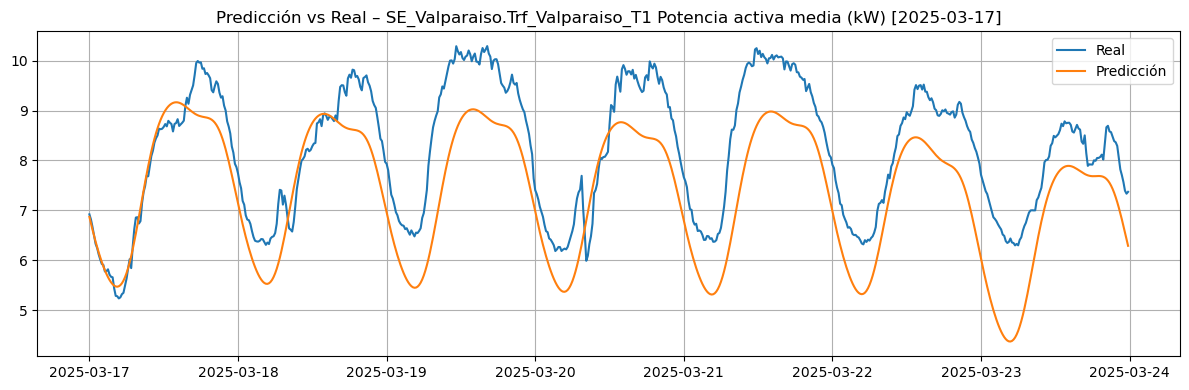

 Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.405 | RMSE: 0.673 | MAPE: 5.77%
 TEST (semana actual):
  MAE:  0.905 | RMSE: 1.026 | MAPE: 11.13%

 Evaluando P para 2025-01-13


17:35:07 - cmdstanpy - INFO - Chain [1] start processing
17:36:41 - cmdstanpy - INFO - Chain [1] done processing


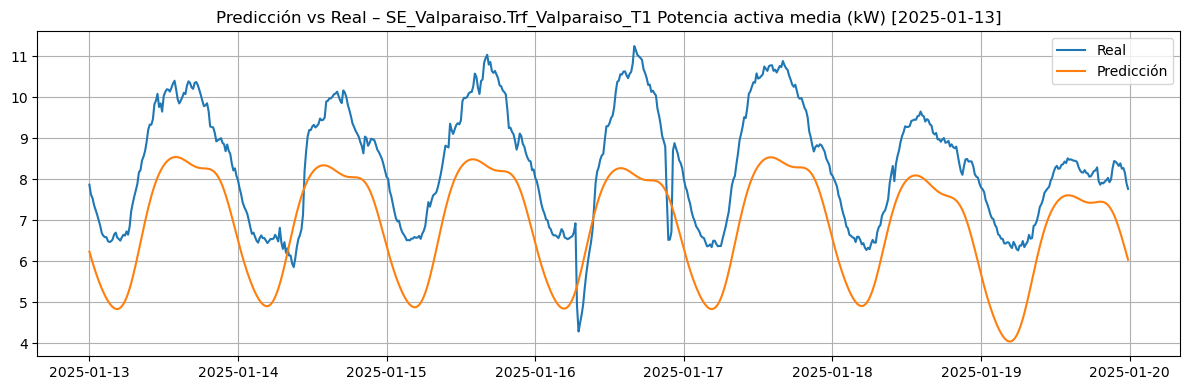

 Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.899 | RMSE: 1.028 | MAPE: 13.05%
 TEST (semana actual):
  MAE:  1.501 | RMSE: 1.583 | MAPE: 18.25%

 Evaluando P para 2024-10-21


17:36:46 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing


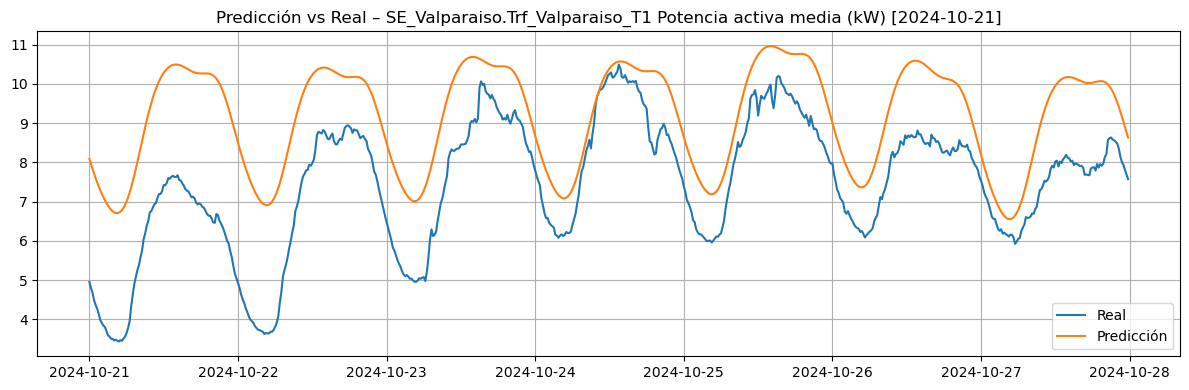

 Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.807 | RMSE: 1.145 | MAPE: 11.81%
 TEST (semana actual):
  MAE:  1.714 | RMSE: 1.932 | MAPE: 26.90%

 Evaluando P para 2024-07-10


17:37:42 - cmdstanpy - INFO - Chain [1] start processing
17:38:38 - cmdstanpy - INFO - Chain [1] done processing


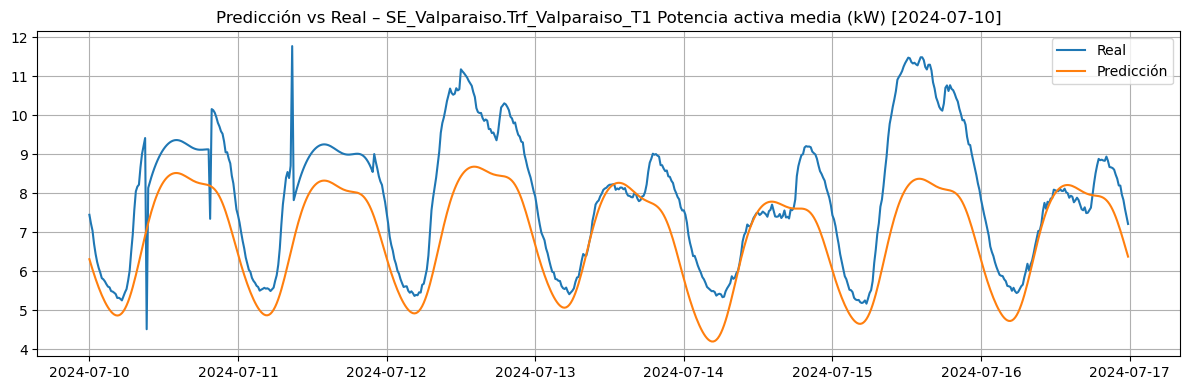

 Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  1.023 | RMSE: 1.301 | MAPE: 12.86%
 TEST (semana actual):
  MAE:  1.087 | RMSE: 1.349 | MAPE: 13.04%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.404536    0.672652    5.774975  0.904878   1.026473   
1        2025-01-13   0.899033    1.028250   13.053895  1.500943   1.582602   
2        2024-10-21   0.807481    1.145312   11.811842  1.714456   1.932104   
3        2024-07-10   1.023195    1.300944   12.864500  1.086753   1.348850   

   MAPE_test  
0  11.129572  
1  18.247525  
2  26.899806  
3  13.036917  


In [42]:
# Lista de fechas a evaluar
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p =     'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
#columna_q =  "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"

# Lista para guardar resultados
resultados_p = []
#resultados_q = []

# Evaluar cada fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet(df_transformadores, columna_p, fecha)
    resultados_p.append(resultado_p)

    #print(f"\n Evaluando Q para {fecha}")
    #resultado_q = ejecutar_modelo_prophet(df_transformadores, columna_q, fecha)
    #resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
#df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
#print("\n Resultados Potencia Reactiva (Q):")
#print(df_resultados_q)

## modelo base con 1 año de train

In [47]:
def ejecutar_modelo_prophet(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)

    # Nuevo rango de entrenamiento: 1 año hasta 1 semana antes del test
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)
    fecha_inicio_train = fecha_fin_train_eval - pd.Timedelta(weeks=52)
    fecha_inicio_train_eval = fecha_fin_train_eval - pd.Timedelta(weeks=1)

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[(df_prophet['ds'] >= fecha_inicio_train) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()

    # Inicializar modelo Prophet con parámetros por defecto
    m = Prophet()
    m.fit(df_train)

    # Construir future con fechas necesarias (eval + test)
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')

    # Predecir
    forecast = m.predict(future)

    # Separar resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f"Test desde: {fecha_inicio_test.date()}")
    print("TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print("TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



 Evaluando P para 2025-03-17


17:56:00 - cmdstanpy - INFO - Chain [1] start processing
17:56:26 - cmdstanpy - INFO - Chain [1] done processing


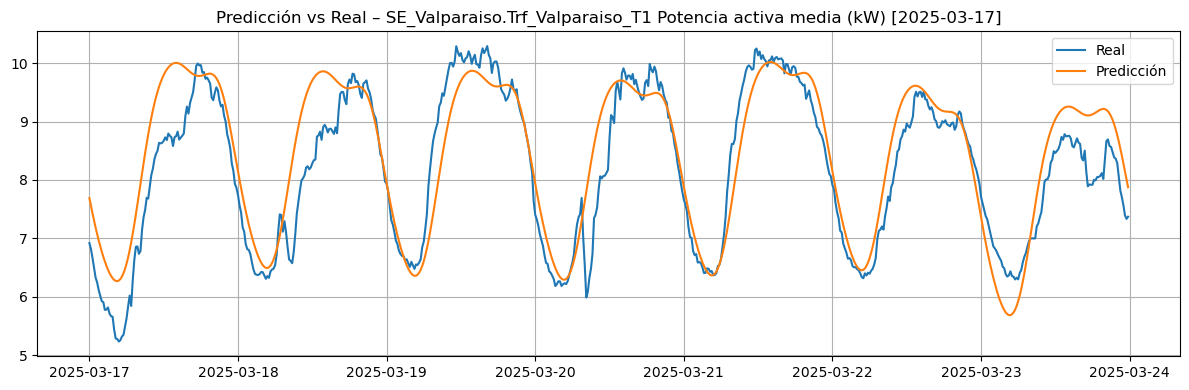

Test desde: 2025-03-17
TRAIN EVAL (semana -4 a -3):
  MAE:  0.408 | RMSE: 0.702 | MAPE: 5.83%
TEST (semana actual):
  MAE:  0.471 | RMSE: 0.613 | MAPE: 6.04%

 Evaluando Q para 2025-03-17


17:56:31 - cmdstanpy - INFO - Chain [1] start processing
17:57:06 - cmdstanpy - INFO - Chain [1] done processing


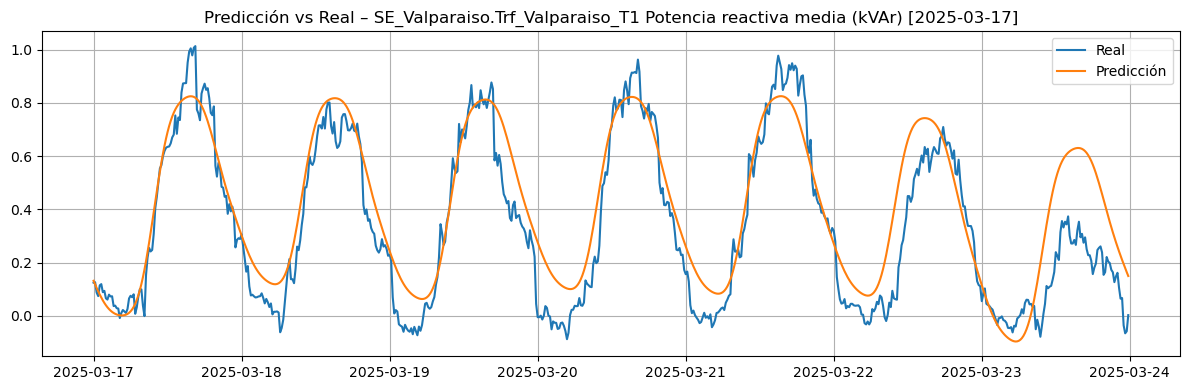

Test desde: 2025-03-17
TRAIN EVAL (semana -4 a -3):
  MAE:  0.147 | RMSE: 0.175 | MAPE: nan%
TEST (semana actual):
  MAE:  0.105 | RMSE: 0.135 | MAPE: 18.47%

 Evaluando P para 2025-01-13


17:57:07 - cmdstanpy - INFO - Chain [1] start processing
17:57:37 - cmdstanpy - INFO - Chain [1] done processing


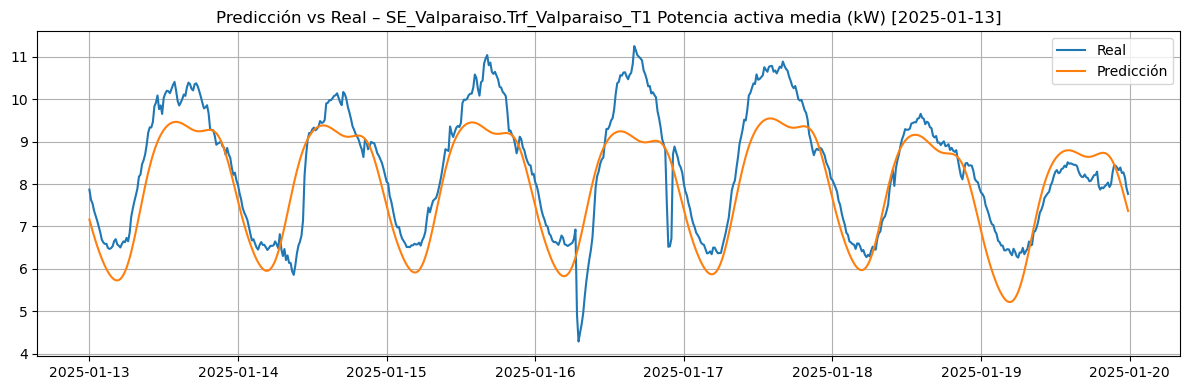

Test desde: 2025-01-13
TRAIN EVAL (semana -4 a -3):
  MAE:  0.878 | RMSE: 1.031 | MAPE: 12.99%
TEST (semana actual):
  MAE:  0.627 | RMSE: 0.771 | MAPE: 7.78%

 Evaluando Q para 2025-01-13


17:57:38 - cmdstanpy - INFO - Chain [1] start processing
17:58:11 - cmdstanpy - INFO - Chain [1] done processing


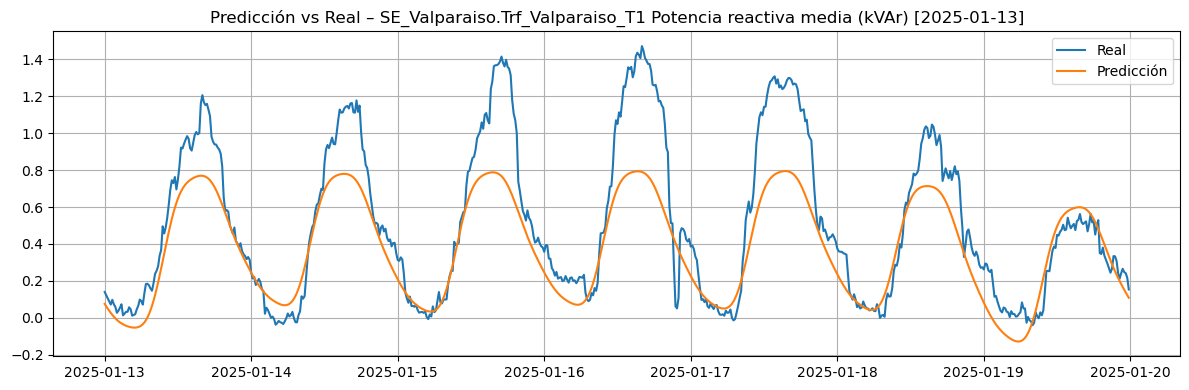

Test desde: 2025-01-13
TRAIN EVAL (semana -4 a -3):
  MAE:  0.215 | RMSE: 0.280 | MAPE: 43.85%
TEST (semana actual):
  MAE:  0.170 | RMSE: 0.235 | MAPE: 38.00%

 Evaluando P para 2024-10-21


17:58:13 - cmdstanpy - INFO - Chain [1] start processing
17:58:42 - cmdstanpy - INFO - Chain [1] done processing


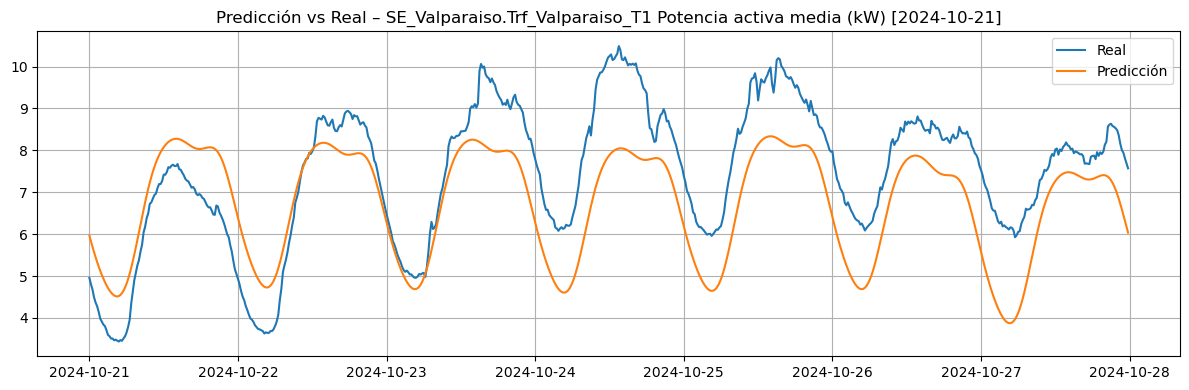

Test desde: 2024-10-21
TRAIN EVAL (semana -4 a -3):
  MAE:  1.119 | RMSE: 1.321 | MAPE: 15.62%
TEST (semana actual):
  MAE:  1.130 | RMSE: 1.257 | MAPE: 15.88%

 Evaluando Q para 2024-10-21


17:58:43 - cmdstanpy - INFO - Chain [1] start processing
17:59:03 - cmdstanpy - INFO - Chain [1] done processing


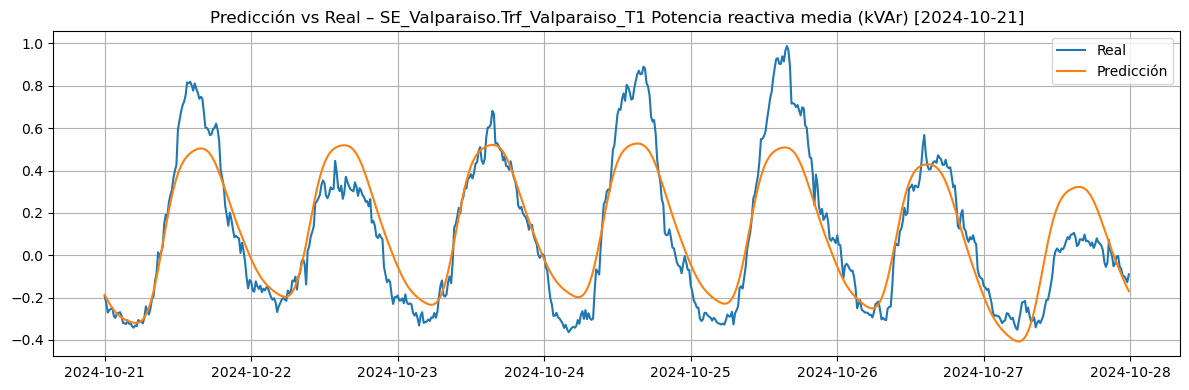

Test desde: 2024-10-21
TRAIN EVAL (semana -4 a -3):
  MAE:  0.104 | RMSE: 0.129 | MAPE: nan%
TEST (semana actual):
  MAE:  0.110 | RMSE: 0.142 | MAPE: nan%

 Evaluando P para 2024-07-10


17:59:04 - cmdstanpy - INFO - Chain [1] start processing
17:59:29 - cmdstanpy - INFO - Chain [1] done processing


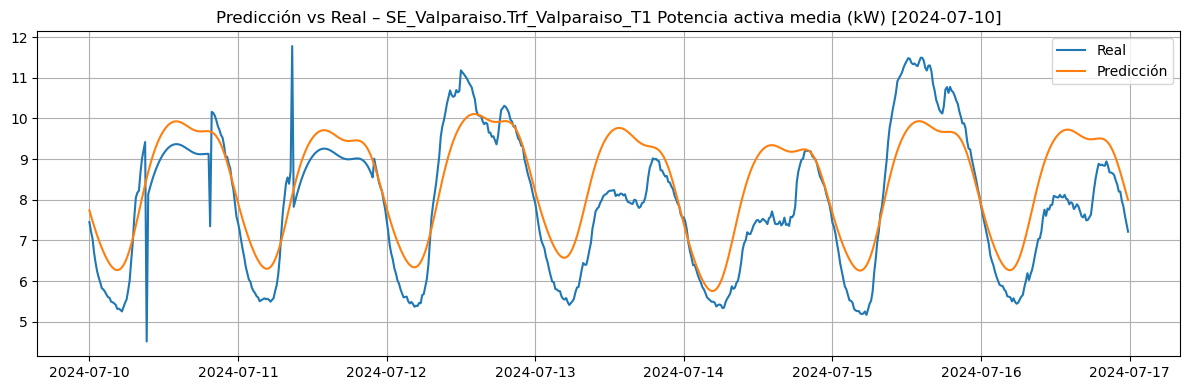

Test desde: 2024-07-10
TRAIN EVAL (semana -4 a -3):
  MAE:  0.793 | RMSE: 1.025 | MAPE: 10.99%
TEST (semana actual):
  MAE:  0.816 | RMSE: 0.983 | MAPE: 11.02%

 Evaluando Q para 2024-07-10


17:59:30 - cmdstanpy - INFO - Chain [1] start processing
18:00:00 - cmdstanpy - INFO - Chain [1] done processing


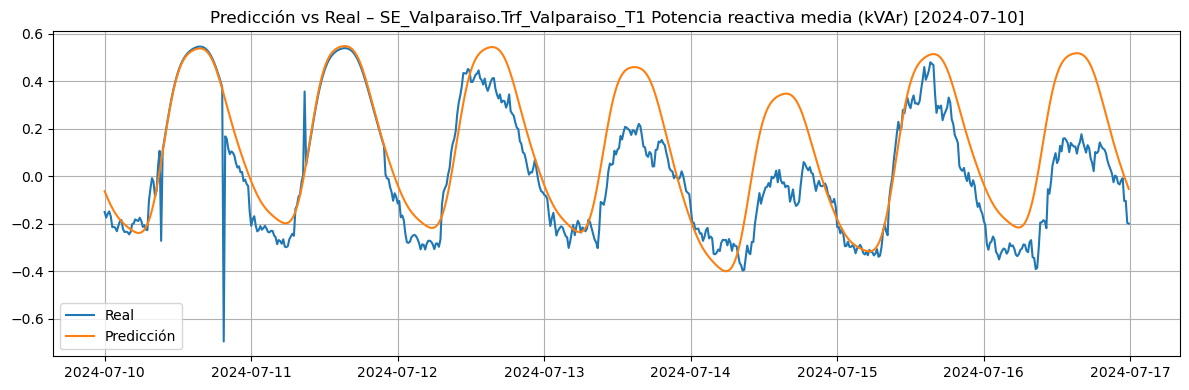

Test desde: 2024-07-10
TRAIN EVAL (semana -4 a -3):
  MAE:  0.108 | RMSE: 0.133 | MAPE: nan%
TEST (semana actual):
  MAE:  0.122 | RMSE: 0.169 | MAPE: nan%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.408487    0.701764    5.826955  0.470543   0.613318   
1        2025-01-13   0.878410    1.031247   12.993261  0.627336   0.771182   
2        2024-10-21   1.118559    1.321323   15.616465  1.130008   1.257431   
3        2024-07-10   0.792995    1.025196   10.989167  0.816175   0.982567   

   MAPE_test  
0   6.035385  
1   7.782080  
2  15.880215  
3  11.020850  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.146524    0.175076         NaN  0.104619   0.134598   
1        2025-01-13   0.214733    0.280436   43.852046  0.170089   0.235170   
2        2024-10-21   0.103689    0.129484         NaN  0.109580  

In [49]:
# Lista de fechas a evaluar
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p =     'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
columna_q =  "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"

# Lista para guardar resultados
resultados_p = []
resultados_q = []

# Evaluar cada fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet(df_transformadores, columna_p, fecha)
    resultados_p.append(resultado_p)

    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet(df_transformadores, columna_q, fecha)
    resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)

## modelo base con 2 año de train

In [56]:
def ejecutar_modelo_prophet(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)

    # Nuevo rango de entrenamiento: 1 año hasta 1 semana antes del test
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)
    fecha_inicio_train = fecha_fin_train_eval - pd.Timedelta(weeks=104)
    fecha_inicio_train_eval = fecha_fin_train_eval - pd.Timedelta(weeks=1)

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[(df_prophet['ds'] >= fecha_inicio_train) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()

    # Inicializar modelo Prophet con parámetros por defecto
    m = Prophet()
    m.fit(df_train)

    # Construir future con fechas necesarias (eval + test)
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')

    # Predecir
    forecast = m.predict(future)

    # Separar resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f"Test desde: {fecha_inicio_test.date()}")
    print("TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print("TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



 Evaluando P para 2025-03-17


18:19:31 - cmdstanpy - INFO - Chain [1] start processing
18:20:26 - cmdstanpy - INFO - Chain [1] done processing


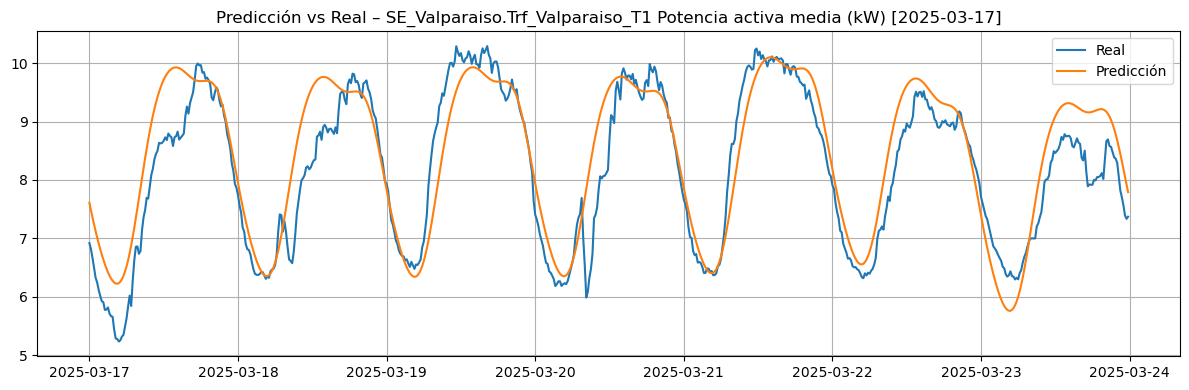

Test desde: 2025-03-17
TRAIN EVAL (semana -4 a -3):
  MAE:  0.401 | RMSE: 0.701 | MAPE: 5.71%
TEST (semana actual):
  MAE:  0.457 | RMSE: 0.595 | MAPE: 5.85%

 Evaluando Q para 2025-03-17


18:20:28 - cmdstanpy - INFO - Chain [1] start processing
18:21:24 - cmdstanpy - INFO - Chain [1] done processing


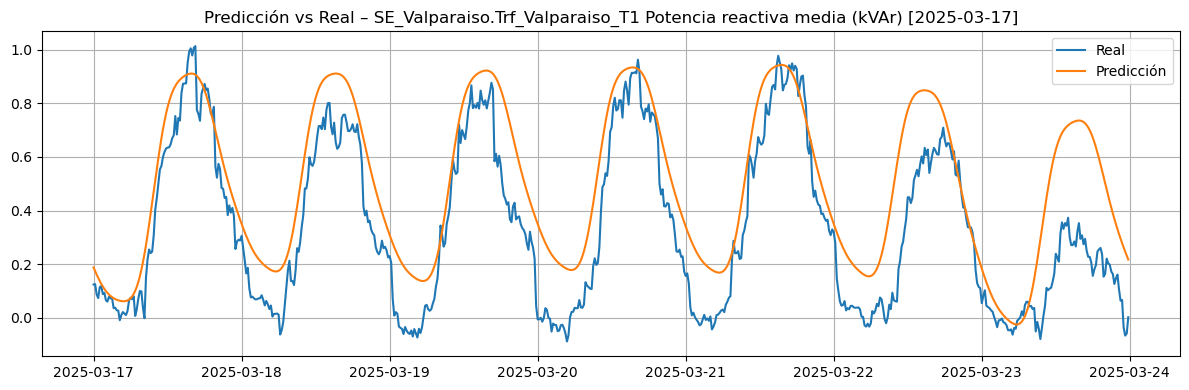

Test desde: 2025-03-17
TRAIN EVAL (semana -4 a -3):
  MAE:  0.180 | RMSE: 0.210 | MAPE: nan%
TEST (semana actual):
  MAE:  0.163 | RMSE: 0.197 | MAPE: 9.87%

 Evaluando P para 2025-01-13


18:21:26 - cmdstanpy - INFO - Chain [1] start processing
18:22:21 - cmdstanpy - INFO - Chain [1] done processing


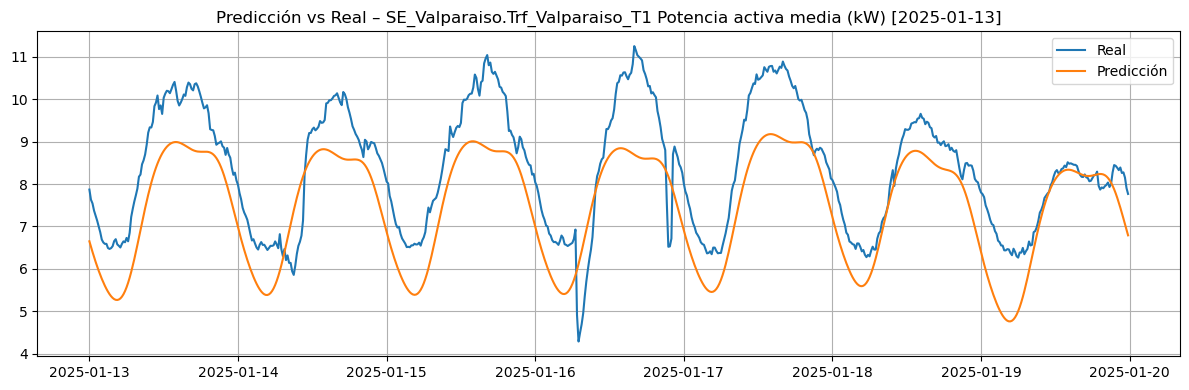

Test desde: 2025-01-13
TRAIN EVAL (semana -4 a -3):
  MAE:  0.907 | RMSE: 1.032 | MAPE: 12.96%
TEST (semana actual):
  MAE:  0.963 | RMSE: 1.077 | MAPE: 11.76%

 Evaluando Q para 2025-01-13


18:22:23 - cmdstanpy - INFO - Chain [1] start processing
18:23:04 - cmdstanpy - INFO - Chain [1] done processing


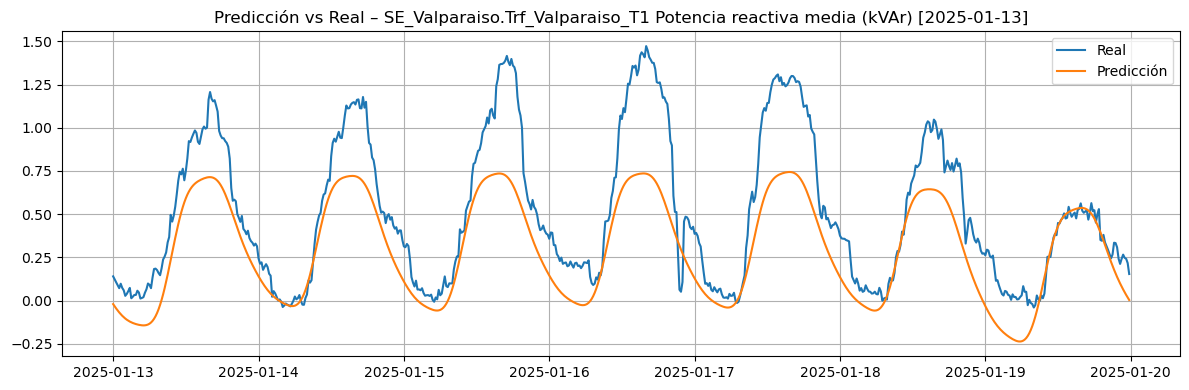

Test desde: 2025-01-13
TRAIN EVAL (semana -4 a -3):
  MAE:  0.219 | RMSE: 0.296 | MAPE: 45.61%
TEST (semana actual):
  MAE:  0.223 | RMSE: 0.283 | MAPE: 42.65%

 Evaluando P para 2024-10-21


18:23:07 - cmdstanpy - INFO - Chain [1] start processing
18:24:13 - cmdstanpy - INFO - Chain [1] done processing


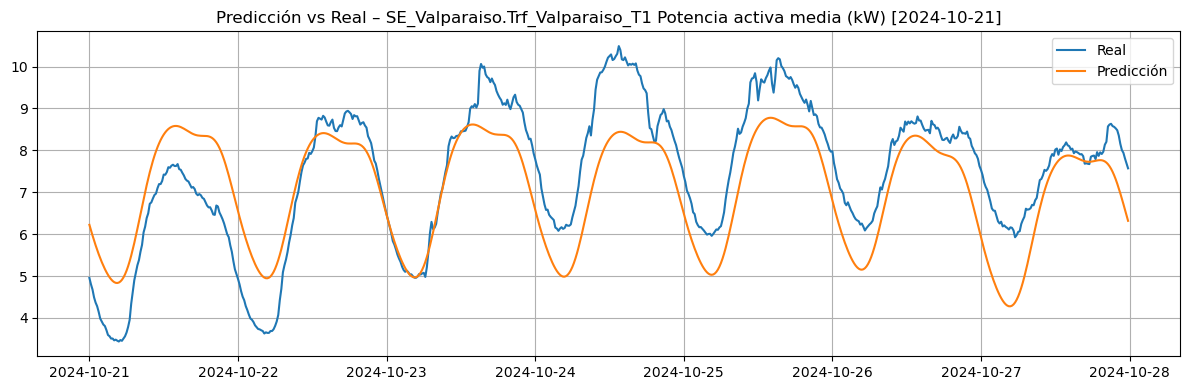

Test desde: 2024-10-21
TRAIN EVAL (semana -4 a -3):
  MAE:  0.951 | RMSE: 1.225 | MAPE: 13.56%
TEST (semana actual):
  MAE:  0.912 | RMSE: 1.055 | MAPE: 13.45%

 Evaluando Q para 2024-10-21


18:24:17 - cmdstanpy - INFO - Chain [1] start processing
18:25:21 - cmdstanpy - INFO - Chain [1] done processing


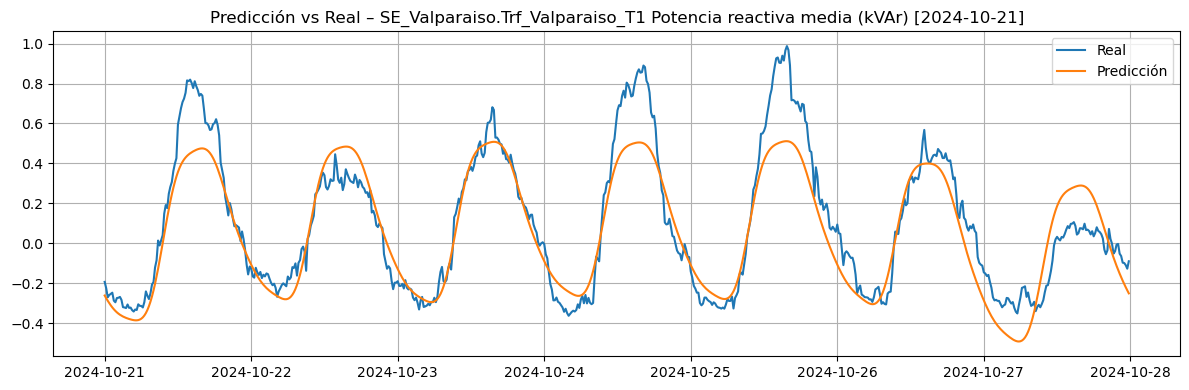

Test desde: 2024-10-21
TRAIN EVAL (semana -4 a -3):
  MAE:  0.124 | RMSE: 0.152 | MAPE: nan%
TEST (semana actual):
  MAE:  0.107 | RMSE: 0.141 | MAPE: nan%

 Evaluando P para 2024-07-10


18:25:23 - cmdstanpy - INFO - Chain [1] start processing
18:26:26 - cmdstanpy - INFO - Chain [1] done processing


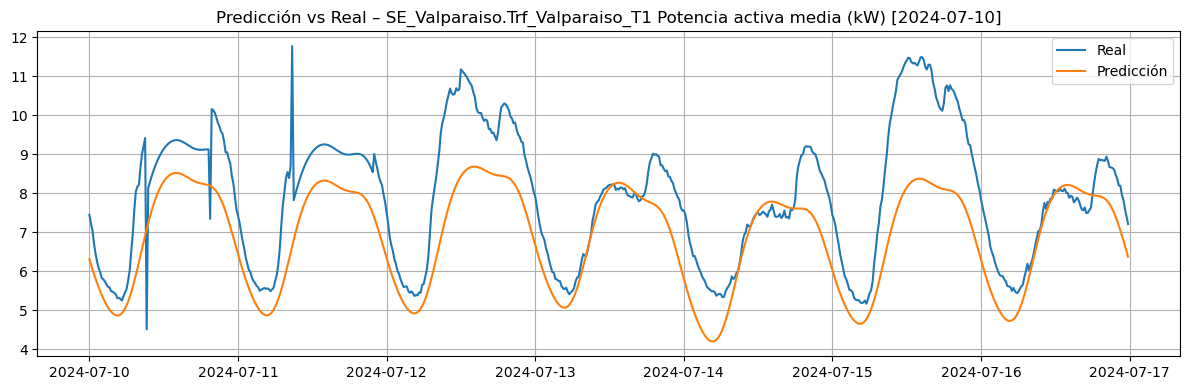

Test desde: 2024-07-10
TRAIN EVAL (semana -4 a -3):
  MAE:  1.022 | RMSE: 1.300 | MAPE: 12.85%
TEST (semana actual):
  MAE:  1.085 | RMSE: 1.347 | MAPE: 13.01%

 Evaluando Q para 2024-07-10


18:26:28 - cmdstanpy - INFO - Chain [1] start processing
18:27:19 - cmdstanpy - INFO - Chain [1] done processing


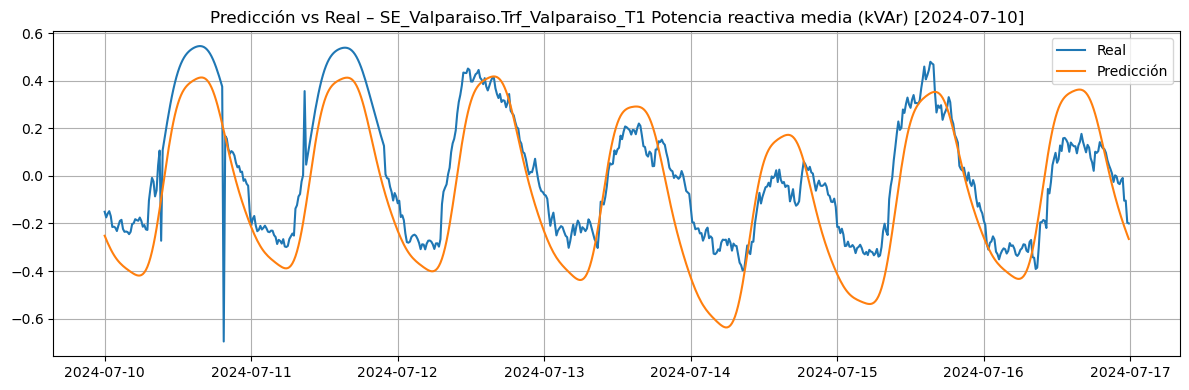

Test desde: 2024-07-10
TRAIN EVAL (semana -4 a -3):
  MAE:  0.152 | RMSE: 0.183 | MAPE: nan%
TEST (semana actual):
  MAE:  0.141 | RMSE: 0.164 | MAPE: nan%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.401199    0.700886    5.714128  0.456810   0.595129   
1        2025-01-13   0.906581    1.031531   12.955599  0.962662   1.077236   
2        2024-10-21   0.951333    1.224674   13.558818  0.912235   1.054709   
3        2024-07-10   1.022189    1.299938   12.853846  1.084542   1.346692   

   MAPE_test  
0   5.852858  
1  11.763278  
2  13.450483  
3  13.007694  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.180425    0.210323         NaN  0.162548   0.196596   
1        2025-01-13   0.218976    0.296399   45.605765  0.223253   0.282582   
2        2024-10-21   0.124130    0.152407         NaN  0.107279  

In [59]:
# Lista de fechas a evaluar
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p =     'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
columna_q =  "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"

# Lista para guardar resultados
resultados_p = []
resultados_q = []

# Evaluar cada fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet(df_transformadores, columna_p, fecha)
    resultados_p.append(resultado_p)

    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet(df_transformadores, columna_q, fecha)
    resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)

## Modelo ajustando parametros estacionalidad

In [29]:
def ejecutar_modelo_prophet(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con estacionalidades personalizadas
    m = Prophet(
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=False
    )
    m.add_seasonality(name='daily_hour', period=1, fourier_order=20)
    m.add_seasonality(name='weekly_custom', period=7, fourier_order=12)
    m.add_seasonality(name='yearly_custom', period=365.25, fourier_order=10)  # nuevo

    # Entrenamiento
    m.fit(df_train)

    # Construcción del futuro
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')

    # Predicción
    forecast = m.predict(future)

    # Evaluación
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f"Test desde: {fecha_inicio_test.date()}")
    print("TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print("TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



 Evaluando P para 2025-03-17


17:16:29 - cmdstanpy - INFO - Chain [1] start processing
17:18:52 - cmdstanpy - INFO - Chain [1] done processing


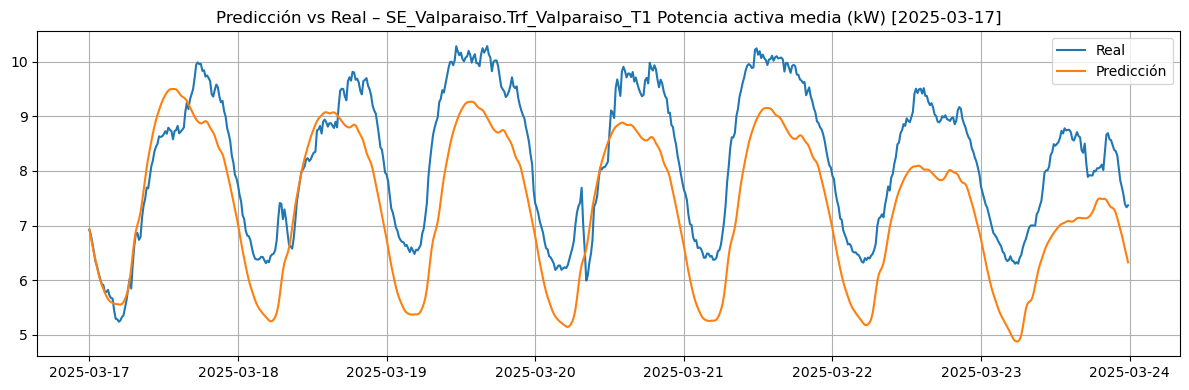

Test desde: 2025-03-17
TRAIN EVAL (semana -4 a -3):
  MAE:  0.358 | RMSE: 0.593 | MAPE: 5.14%
TEST (semana actual):
  MAE:  0.964 | RMSE: 1.049 | MAPE: 11.91%

 Evaluando P para 2025-01-13


17:19:01 - cmdstanpy - INFO - Chain [1] start processing
17:21:09 - cmdstanpy - INFO - Chain [1] done processing


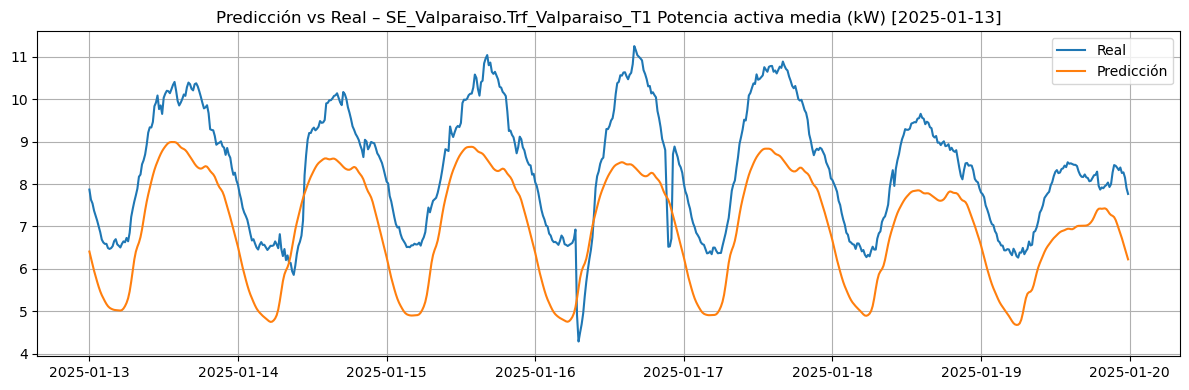

Test desde: 2025-01-13
TRAIN EVAL (semana -4 a -3):
  MAE:  0.911 | RMSE: 1.002 | MAPE: 13.01%
TEST (semana actual):
  MAE:  1.407 | RMSE: 1.467 | MAPE: 17.20%

 Evaluando P para 2024-10-21


17:21:16 - cmdstanpy - INFO - Chain [1] start processing
17:22:12 - cmdstanpy - INFO - Chain [1] done processing


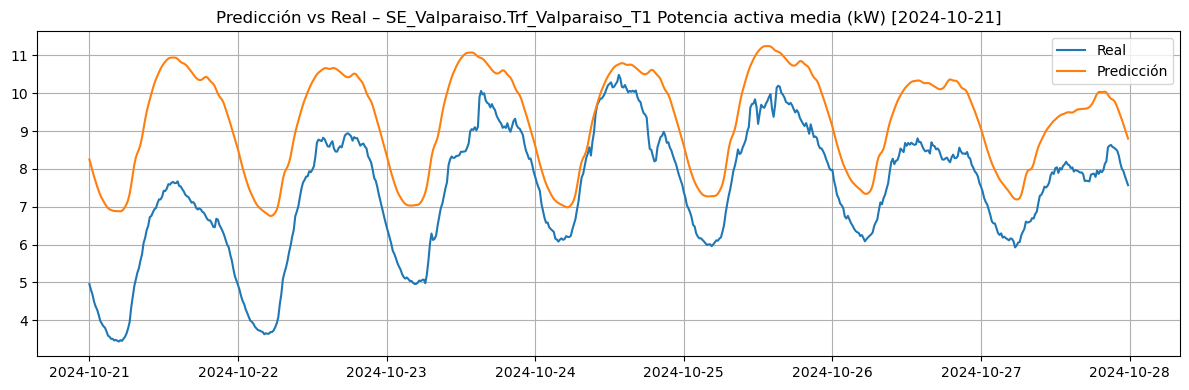

Test desde: 2024-10-21
TRAIN EVAL (semana -4 a -3):
  MAE:  0.781 | RMSE: 1.125 | MAPE: 11.55%
TEST (semana actual):
  MAE:  1.801 | RMSE: 2.002 | MAPE: 28.01%

 Evaluando P para 2024-07-10


17:22:19 - cmdstanpy - INFO - Chain [1] start processing
17:24:45 - cmdstanpy - INFO - Chain [1] done processing


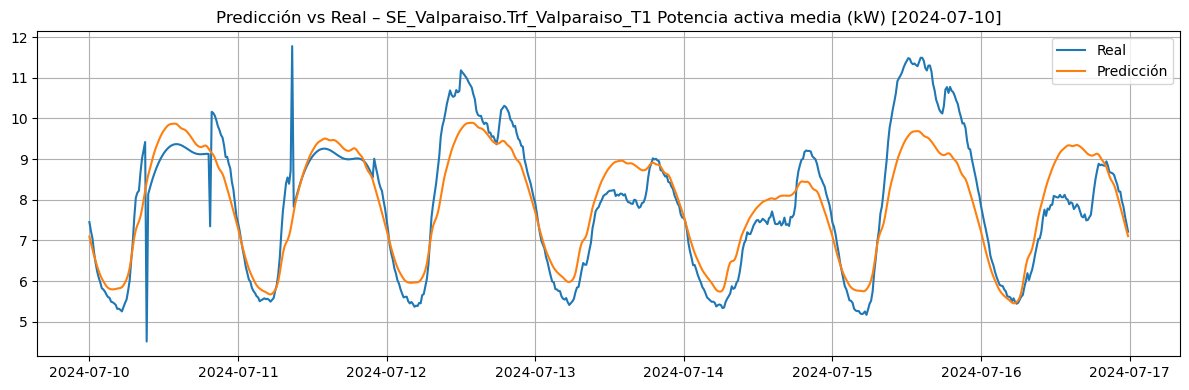

Test desde: 2024-07-10
TRAIN EVAL (semana -4 a -3):
  MAE:  0.760 | RMSE: 1.001 | MAPE: 10.58%
TEST (semana actual):
  MAE:  0.589 | RMSE: 0.772 | MAPE: 7.24%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.358350    0.592935    5.136616  0.964106   1.048602   
1        2025-01-13   0.910600    1.002305   13.014837  1.406930   1.467302   
2        2024-10-21   0.780972    1.125313   11.547810  1.801167   2.001592   
3        2024-07-10   0.759844    1.000675   10.583998  0.588797   0.771734   

   MAPE_test  
0  11.911419  
1  17.195713  
2  28.008423  
3   7.236216  


In [33]:
# Lista de fechas a evaluar
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p =     'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
#columna_q =  "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"

# Lista para guardar resultados
resultados_p = []
#resultados_q = []

# Evaluar cada fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet(df_transformadores, columna_p, fecha)
    resultados_p.append(resultado_p)

    #print(f"\n Evaluando Q para {fecha}")
    #resultado_q = ejecutar_modelo_prophet(df_transformadores, columna_q, fecha)
    #resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
#df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
#print("\n Resultados Potencia Reactiva (Q):")
#print(df_resultados_q)